In [1]:
import mglearn   

# 데이터분석 학습용 시각화...

# conda install mglearn
# pip install mglearn

In [2]:
# mglearn.plots.plot_agglomerative_algorithm()

from IPython.display import Image

In [3]:
Image('agglome.png')

FileNotFoundError: No such file or directory: 'agglome.png'

FileNotFoundError: No such file or directory: 'agglome.png'

<IPython.core.display.Image object>

In [4]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples = 150, 
                n_features = 2,
                centers = 3,
                cluster_std = 1.5,
                shuffle=True,
                random_state=111)

In [5]:
x[:5]

array([[ 3.02502619, -6.64995621],
       [ 1.78012164, -3.46392124],
       [-3.96317034, -9.12684108],
       [-1.13966036, -8.04047162],
       [ 2.16089018, -4.9385737 ]])

In [6]:
y[:5]

array([0, 0, 2, 2, 0])

In [7]:
import matplotlib.pyplot as plt

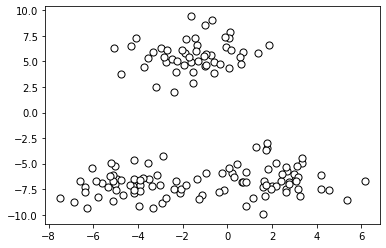

In [8]:
plt.scatter(x[:, 0], x[:, 1], c='white', marker='o', edgecolor='black', s=50)

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3,   # 군집 수
           init='random',     # 최초 중심점을 찍는 방법
           max_iter=300,      # 최대 반복 횟수..
           random_state=11)   # 동일한 결과가 나오도록 하는 seed값

km.fit(x)
y_km = km.predict(x)
y_km

array([1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1,
       0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1,
       1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2])

In [10]:
km.cluster_centers_  # 중심점의 x, y 좌표

array([[-4.23692972, -7.12879352],
       [ 2.05701921, -6.47903349],
       [-1.53262155,  5.64168246]])

In [11]:
y_km==0

array([False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True,

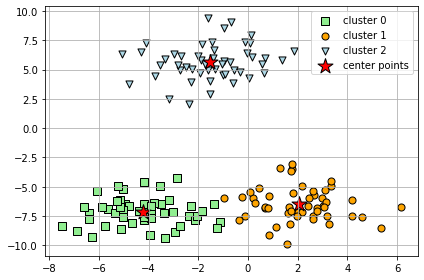

In [12]:
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=50, c='lightgreen', marker='s', \
            edgecolor='black', label='cluster 0')  # row bool indexing : cluster가 0인 row만 선택

plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=50, c='orange', marker='o', \
            edgecolor='black', label='cluster 1')  # row bool indexing : cluster가 1인 row만 선택

plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=50, c='lightblue', marker='v', \
            edgecolor='black', label='cluster 2')  # row bool indexing : cluster가 2인 row만 선택

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1] , s=250, c='red', marker='*', \
            edgecolor='black', label='center points')  

plt.legend(scatterpoints=1, loc=0)
plt.grid()
plt.tight_layout()
plt.show()


In [13]:
# cluster의 갯수 : hyper parameter로 분석가의 필요에 따라 설정.. 절대적 기준은 없다..

# inertia
# cluster모델의 대략적인 평가 지표..
# cluster 내부에 데이터들이 얼마나 촘촘히 뭉쳐있는지를 계산하는 값..
# cluster 내 데이터들의 std를 계산
# 보조적인 지표
# cluster 숫자를 늘이면 inertia값은 자동으로 감소..

In [14]:
km.inertia_

621.0835498986672

In [15]:
# inertia를 통한 최적의 cluster 갯수를 찾기..

In [16]:
import warnings
warnings.filterwarnings(action='ignore')

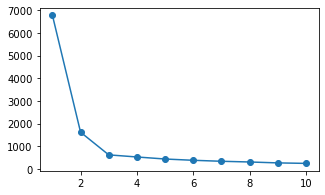

In [17]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init='random',
               random_state=111)
    km.fit(x)
    distortions.append(km.inertia_)  # 군집 내 데이터의 뭉쳐진 수준 (std)
    
plt.figure(figsize=(5,3))
plt.plot(range(1,11), distortions, marker='o')
plt.show()

# cluster 3개로 나누면 더 이상 나누어도 inertia값이 감소하지 않는다..
# cluster 3개로 나누면 데이터는 충분히 clustering이 된다 - 유사한 데이터를 효윯적으로 묶는다..

In [18]:
# silhouette

# inertia보다 더 정교하게 cluster를 평가하는 지표.. 절대지표는 존재하지 않는다.. 보조지표..
# 군집 내의 데이터들이 얼마나 결합력있게 그룹핑이 되어 있는가..
# 군집 내의 샘플들 간의 거리 - a
# 군집 간의 샘플들 간의 거리 - b
# silhouette = (b-a)/max(a,b) , 클수록 좋은 군집..
# 군잽 내에서는 데이터들 간의 거리가 가깝고, 군집 간에는 데이터들의 거리가 멀수록 좋은 모델이다..

In [19]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [20]:
km = KMeans(n_clusters = 3,
           init = 'k-means++', 
           random_state=111)
# km.fit(x)
# y_km = km.predict(x)
y_km = km.fit_predict(x)
y_km

# k-means++ : k-means의 upgrade version,
# k-means : 초기에 중심점을 random하게 지정 - 중심점이 뭉쳐지는 경우 학습이 잘 안됨..
# k-means++ : 초기 중심점을 서로 떨어지도록 지정 - 더 효율적으로 빠르게 clustering을 수행

array([2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2,
       0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1])

In [21]:
silhouette_vals = silhouette_samples(x, y_km)
silhouette_vals   

# 모든 데이터들의 silhouette 값을 출력..

array([0.72678562, 0.52168964, 0.60619074, 0.08649779, 0.65583527,
       0.73177957, 0.70023017, 0.6593154 , 0.7519256 , 0.81257245,
       0.69951279, 0.48040552, 0.80370943, 0.69599532, 0.56923683,
       0.72005179, 0.56749871, 0.6402353 , 0.59002747, 0.81759747,
       0.77467314, 0.6570059 , 0.69379868, 0.80958266, 0.64805824,
       0.70500658, 0.81248816, 0.11749307, 0.81450808, 0.71285961,
       0.82917199, 0.75391019, 0.70931592, 0.68662012, 0.46012099,
       0.73345773, 0.48504612, 0.6654153 , 0.73040954, 0.55066749,
       0.72265026, 0.7276097 , 0.51849011, 0.53373745, 0.3154189 ,
       0.41123078, 0.5362938 , 0.52567916, 0.76952939, 0.48931493,
       0.33752315, 0.41896696, 0.4747681 , 0.65880566, 0.75016455,
       0.68553385, 0.72877362, 0.77581622, 0.61126431, 0.75053793,
       0.83933949, 0.55734145, 0.68310549, 0.64125439, 0.4469979 ,
       0.82268711, 0.63072105, 0.48476211, 0.40625107, 0.73752268,
       0.71374958, 0.40316451, 0.6915561 , 0.74430546, 0.83677

In [22]:
len(silhouette_vals)

150

In [23]:
import numpy as np

In [24]:
# 1. 현 cluster의 silhouette점수 - 모든 데이터들의 silhouette점수들의 평균

np.mean(silhouette_vals)

0.6591255456301656

In [25]:
# 2. 시각화를 통해서 클러스터 간의 데이터들의 silhouette 분포를 확인.. - 클러스터 간의 비교

# - 각 클러스터의 데이터들의 silhouette값의 분포가 균등하면 적절한 clustering..
# - 각 클러스터의 데이터들의 silhouette값의 분포가 불균등하면 비효율적으로 clustering.

In [26]:
y_km == 0

array([False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True,

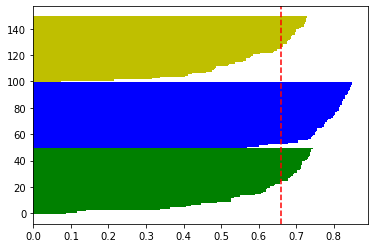

In [27]:
y_ax_lower, y_ax_upper = 0, 0
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

clist = ['g','b','y']

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]  # boolean indexing : 해당 cluster의 silhouette값만
    c_silhouette_vals.sort()  # silhouette값을 올림차순 정렬
    y_ax_upper += len(c_silhouette_vals)  # bar chart upper값을 수정
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,  # 수평 barchart그린다..
            edgecolor='none', color=clist[i])
    
    y_ax_lower += len(c_silhouette_vals)  # bar chart lower값을 수정
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.show()

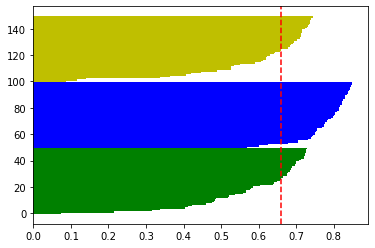

0.6591255456301656


In [29]:
km =KMeans(n_clusters=3,
          init='random')

y_km = km.fit_predict(x)

y_ax_lower, y_ax_upper = 0, 0
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(x, y_km)

clist = ['g','b','y', 'r']

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]  # boolean indexing : 해당 cluster의 silhouette값만
    c_silhouette_vals.sort()  # silhouette값을 올림차순 정렬
    y_ax_upper += len(c_silhouette_vals)  # bar chart upper값을 수정
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,  # 수평 barchart그린다..
            edgecolor='none', color=clist[i])
    
    y_ax_lower += len(c_silhouette_vals)  # bar chart lower값을 수정
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.show()

print(silhouette_avg)